# How to Select Categorical Input Features
The two most commonly used feature selection methods for
categorical input data when the target variable is also categorical (e.g. classification predictive
modeling) are the chi-squared statistic and the mutual information statistic.

This tutorial is divided into three parts; they are:
1. Breast Cancer Categorical Dataset
2. Categorical Feature Selection
3. Modeling With Selected Features

In [3]:
# example of loading and preparing the breast cancer dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# load the dataset
def load_dataset(filename):
    # load the dataset
    data = read_csv(filename, header=None)
    # retrieve array
    dataset = data.values
    # split into input and output variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
# load the dataset
X, y = load_dataset( '../../Datasets/breast-cancer.csv' )
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# summarize
print( ' Train ' , X_train_enc.shape, y_train_enc.shape)
print( ' Test ' , X_test_enc.shape, y_test_enc.shape)

 Train  (191, 9) (191,)
 Test  (95, 9) (95,)


 Feature 0: 0.472553 
 Feature 1: 0.029193 
 Feature 2: 2.137658 
 Feature 3: 29.381059 
 Feature 4: 8.222601 
 Feature 5: 8.100183 
 Feature 6: 1.273822 
 Feature 7: 0.950682 
 Feature 8: 3.699989 


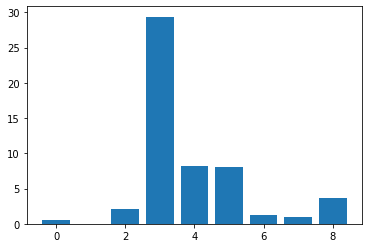

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k= 'all' )
    #fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# what are scores for the features
for i in range(len(fs.scores_)):
    print( ' Feature %d: %f ' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# fit the model
model = LogisticRegression(solver= 'lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print( ' Accuracy: %.2f ' % (accuracy*100))

 Accuracy: 75.79 
